<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/NLP_%EC%97%B0%EC%8A%B5_7%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteICXQDR/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteICXQDR/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteICXQDR/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))


In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 561,089
Trainable params: 561,089
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 92s 234ms/step - loss: 0.6934 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 93s 238ms/step - loss: 0.6937 - accuracy: 0.5003 - val_loss: 0.6928 - val_accuracy: 0.5024
Epoch 3/10
391/391 [==============================] - 90s 230ms/step - loss: 0.6918 - accuracy: 0.5064 - val_loss: 0.6956 - val_accuracy: 0.5010
Epoch 4/10
391/391 [==============================] - 90s 231ms/step - loss: 0.6892 - accuracy: 0.5037 - val_loss: 0.6933 - val_accuracy: 0.5011
Epoch 5/10
391/391 [==============================] - 89s 229ms/step - loss: 0.6876 - accuracy: 0.4993 - val_loss: 0.6947 - val_accuracy: 0.5031
Epoch 6/10
391/391 [==============================] - 89s 228ms/step - loss: 0.6870 - accuracy: 0.5018 - val_loss: 0.6945 - val_accuracy: 0.5009
Epoch 7/10
391/391 [==============================] - 90s 229ms/step - loss: 0.6857 - accuracy: 0.5045 - val_loss: 0.6964 - val_ac

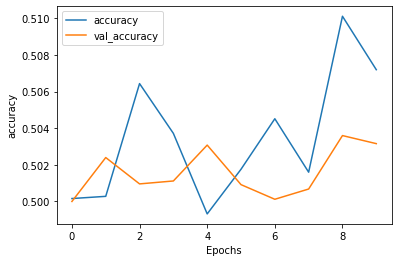

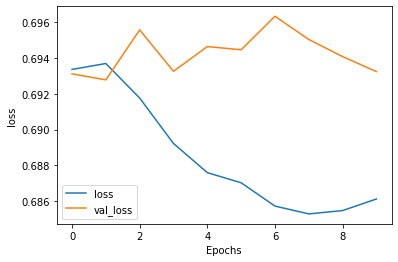

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 165s 422ms/step - loss: 0.5378 - accuracy: 0.7189 - val_loss: 0.5821 - val_accuracy: 0.7411
Epoch 2/10
391/391 [==============================] - 163s 417ms/step - loss: 0.3881 - accuracy: 0.8360 - val_loss: 0.4335 - val_accuracy: 0.8052
Epoch 3/10
391/391 [==============================] - 164s 419ms/step - loss: 0.3091 - accuracy: 0.8747 - val_loss: 0.3804 - val_accuracy: 0.8455
Epoch 4/10
391/391 [==============================] - 164s 418ms/step - loss: 0.2342 - accuracy: 0.9118 - val_loss: 0.4246 - val_accuracy: 0.8482
Epoch 5/10
391/391 [==============================] - 162s 415ms/step - loss: 0.3241 - accuracy: 0.8600 - val_loss: 0.6332 - val_accuracy: 0.6952
Epoch 6/10
391/391 [==============================] - 163s 417ms/step - loss: 0.3617 - accuracy: 0.8509 - val_loss: 0.6335 - val_accuracy: 0.7060
Epoch 7/10
391/391 [==============================] - 162s 416ms/step - loss: 0.3974 - accuracy: 0.8192 - val_loss: 0.6129 -

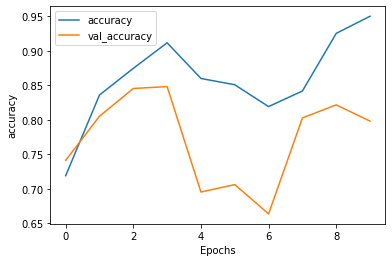

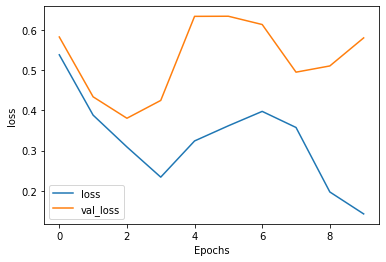

In [17]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 322s 824ms/step - loss: 0.5685 - accuracy: 0.7018 - val_loss: 0.5382 - val_accuracy: 0.7479
Epoch 2/10
391/391 [==============================] - 317s 811ms/step - loss: 0.4494 - accuracy: 0.7938 - val_loss: 0.4881 - val_accuracy: 0.7698
Epoch 3/10
391/391 [==============================] - 315s 806ms/step - loss: 0.3407 - accuracy: 0.8638 - val_loss: 0.4298 - val_accuracy: 0.8196
Epoch 4/10
391/391 [==============================] - 318s 814ms/step - loss: 0.2896 - accuracy: 0.8863 - val_loss: 0.5864 - val_accuracy: 0.6829
Epoch 5/10
391/391 [==============================] - 316s 809ms/step - loss: 0.2785 - accuracy: 0.8913 - val_loss: 0.4166 - val_accuracy: 0.8383
Epoch 6/10
391/391 [==============================] - 314s 802ms/step - loss: 0.1882 - accuracy: 0.9325 - val_loss: 0.4705 - val_accuracy: 0.8220
Epoch 7/10
391/391 [==============================] - 313s 799ms/step - loss: 0.1511 - accuracy: 0.9472 - val_loss: 0.6100 -

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAvgPool1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)
